In [1]:
import control as ctrl
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib import rcParams, pyplot as plt

rcParams.update(
    {"figure.autolayout": True, "font.family": "serif", "text.usetex": True}
)
s = ctrl.tf("s")

State Feedback Gain K: [[79.9999392 10.2      ]]
[[  0.]
 [930.]]


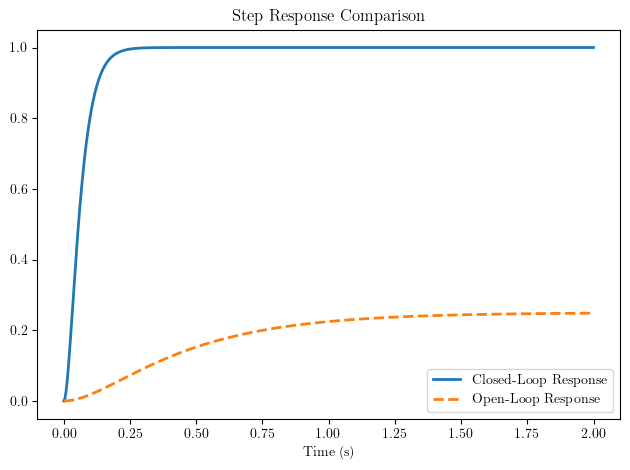

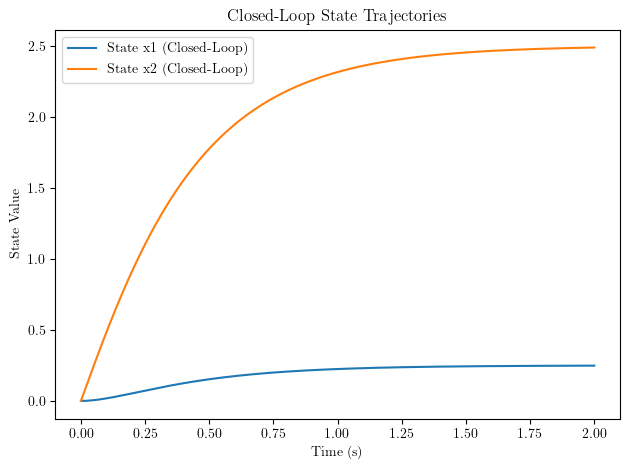

<StateSpace>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-10.         1.      ]
     [-20.000304   0.      ]]

B = [[0.]
     [5.]]

C = [[1. 0.]]

D = [[0.]]


In [2]:
G = 5 / (s + 7.236) / (s + 2.764)
G = ctrl.tf2ss(G)
G, _ = ctrl.observable_form(G)
A, B, C, D = ctrl.ssdata(G)
Qc = ctrl.ctrb(A, B)
if np.linalg.matrix_rank(Qc) != A.shape[0]:
    print("System is not controllable")
else:
    K = ctrl.place(A, B, [-30, -31])
    print("State Feedback Gain K:", K)
    A_m = A - B @ K
    B_m = B @ (-1 / (C @ np.linalg.inv(A_m) @ B))
    print(B_m)
    G_cl = ctrl.ss(A_m, B_m, C, D)
    t = np.linspace(0, 2, 500)
    t_cl, y_cl = ctrl.step_response(G_cl, t)
    t_ol, y_ol, x_cl = ctrl.step_response(G, t, return_x=True)
    plt.plot(t_cl, y_cl, label="Closed-Loop Response", linewidth=2)
    plt.plot(t_ol, y_ol, label="Open-Loop Response", linestyle="--", linewidth=2)
    plt.title("Step Response Comparison")
    plt.xlabel("Time (s)")
    plt.legend()
    # Plot states for closed-loop system
    plt.figure()
    plt.plot(t, x_cl[0], label="State x1 (Closed-Loop)")
    plt.plot(t, x_cl[1], label="State x2 (Closed-Loop)")
    plt.title("Closed-Loop State Trajectories")
    plt.xlabel("Time (s)")
    plt.ylabel("State Value")
    plt.legend()
    plt.show()
print(G)